1.) Set Up Environment

In [1]:
import pandas as pd #dataframe library
import numpy as np #numeric library
import datetime as dt

#plot library
import matplotlib.pyplot as plt 
import seaborn as sns 

#evaluation library
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score

#label encoder library
from sklearn.preprocessing import LabelEncoder

# for min_max scaling (Kaggle)
from mlxtend.preprocessing import minmax_scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# ganti datatime
from sklearn.preprocessing import StandardScaler

# for Box-Cox Transformation
from scipy import stats

# set seed for reproducibility
np.random.seed(0)

2.) Dataset Preparation

In [2]:
# for SMP Team
smp_url = 'https://docs.google.com/spreadsheets/d/1fQjK_yvaj5yh006nRTcMXaoU0RAx8OUy2IhpZG4tNMw/edit#gid=0'
smp_data = smp_url.replace('/edit#gid=', '/export?format=csv&gid=')
smp = pd.read_csv(smp_data)

# for NS Team
ns_url = 'https://docs.google.com/spreadsheets/d/16Vrap9JRBTrq9vA-Xz-1ZkLv0GiaWZ6oETrhL4ry-Ok/edit#gid=0'
ns_data = ns_url.replace('/edit#gid=', '/export?format=csv&gid=')
ns = pd.read_csv(ns_data)

# for ITInfra Team
infra_url = 'https://docs.google.com/spreadsheets/d/1RxhtYZPFhB5F2a3434SAC6K11j_sRMhRDu5avKHMAQg/edit#gid=0'
infra_data = infra_url.replace('/edit#gid=', '/export?format=csv&gid=')
infra = pd.read_csv(infra_data)

# for Finance Team
fin_url = 'https://docs.google.com/spreadsheets/d/1F0KiwUmqIiknViTQ4Os_SdHdBVA2ErOOrSgH2Hqeumc/edit#gid=0'
fin_data = fin_url.replace('/edit#gid=', '/export?format=csv&gid=')
fin = pd.read_csv(fin_data)

3.) Merge Columns

In [3]:
# buat kolom baru di table infra
infra['payment_cat'] = ''

# looping untuk kondisi
for index, row in infra.iterrows():
    subsno_infra = row['subs_no']
    
    # cari kecocokan
    match = fin[
        (fin['subs_no'] == subsno_infra) 
    ]
    
    # copy data yang sesuai
    if not match.empty:
        infra.at[index, 'payment_cat'] = match.iloc[0]['payment_cat']

total_infra= len(infra)
print(total_infra)

43947


In [4]:
# buat kolom baru di table infra
infra['subs_key'] = ''
infra['rem_bal'] = ''
infra['rtd_amt'] = ''
infra['free_unit'] = ''
infra['usg_unit'] = ''
infra['sid'] = ''

# looping untuk kondisi
for index, row in infra.iterrows():
    servicefilter_infra = row['service_filter']
    subsno_infra = row['subs_no']
    timeno_infra = row['time_no']
    
    # cari kecocokan
    match = ns[
        (ns['service_filter'] == servicefilter_infra) &
        (ns['subs_no'] == subsno_infra) &
        (ns['time_no'] == timeno_infra)
    ]
    
    # copy data yang sesuai
    if not match.empty:
        infra.at[index, 'subs_key'] = match.iloc[0]['subs_key']
        infra.at[index, 'rem_bal'] = match.iloc[0]['rem_bal']
        infra.at[index, 'rtd_amt'] = match.iloc[0]['rtd_amt']
        infra.at[index, 'free_unit'] = match.iloc[0]['free_unit']
        infra.at[index, 'usg_unit'] = match.iloc[0]['usg_unit']
        infra.at[index, 'sid'] = match.iloc[0]['sid']

total_infra= len(infra)
print(total_infra)

43947


4.) Make a Copy 

In [5]:
data = infra.copy()

5.) Change Name and Order of Columns)

In [6]:
print(data.columns)

Index(['day_no', 'time_no', 'service_filter', 'subs_no', 'b_no',
       'event_action_code', 'prefix_dom_sk_id', 'originating_cell_id',
       'home_poc', 'city_name', 'physical_poc', 'roam_zone', 'destination_poc',
       'payment_cat', 'subs_key', 'rem_bal', 'rtd_amt', 'free_unit',
       'usg_unit', 'sid'],
      dtype='object')


In [7]:
col_name = [
    'date', #date
    'date_time' , #date and time
    'service_type', #service_type
    'subs_no', #subs_no
    'destination_no', #b_no
    'event_action_code', #event_action_code
    'prefix_domain', #prefix_dom_sk_id
    'cell_id', #originating_cell_id
    'home_poc', #home_poc
    'city_name', #city_name
    'physical_poc', #physical_poc
    'roam_zone', #roam_zone
    'destination_poc', #destination_poc
    'payment_type', #payment_cat
    'subs_id', #subs_key
    'remaining_balance', #rem_bal
    'amount_of_trx', #rtd_amt
    'free_unit', #free_unit
    'usage_unit', #usg_unit
    'sid' #sid
]

col_name = [
    'date', #date
    'date_time' , #date and time
    'service_type', #service_type
    'subs_no', #subs_no
    'destination_no', #b_no
    'event_action_code', #event_action_code
    'prefix_domain', #prefix_dom_sk_id
    'cell_id', #originating_cell_id
    'home_poc', #home_poc
    'city_name', #city_name
    'physical_poc', #physical_poc
    'roam_zone', #roam_zone
    'destination_poc', #destination_poc
    'payment_type', #payment_cat
    'subs_id', #subs_key
    'remaining_balance', #rem_bal
    'amount_of_trx', #rtd_amt
    'free_unit', #free_unit
    'usage_unit', #usg_unit
    'sid' #sid
]

data.columns = col_name


order = [
    'date', #date
    'date_time' , #date and time
    'subs_no', #subs_no
    'subs_id', #subs_key
    'payment_type', #payment_cat
    'service_type', #service_type
    'destination_no', #b_no
    'event_action_code', #event_action_code
    'prefix_domain', #prefix_dom_sk_id
    'cell_id', #originating_cell_id
    'home_poc', #home_poc
    'city_name', #city_name
    'physical_poc', #physical_poc
    'roam_zone', #roam_zone
    'destination_poc', #destination_poc
    'remaining_balance', #rem_bal
    'amount_of_trx', #rtd_amt
    'free_unit', #free_unit
    'usage_unit', #usg_unit
    'sid' #sid
]

data = data[order]



6.) Dropping Un-Needed Columns

In [8]:
data = data.drop(['subs_id','destination_no','cell_id','prefix_domain','event_action_code', 'roam_zone', 'sid'], axis = 1)
data.head()

date          date_time     subs_no payment_type service_type home_poc   
0  9/1/2021  9/1/2021 21:24:31  2106705274          PRE       SMSBAS      JK0  \
1  9/1/2021  9/1/2021 21:29:28  2106705274          PRE       SMSBAS      JK0   
2  9/1/2021  9/1/2021 21:36:35  2106705274          PRE       SMSBAS      JK0   
3  9/1/2021   9/1/2021 7:43:24  1075588229          PRE       VASOCC    NOPOC   
4  9/1/2021   9/1/2021 4:24:54  1075588229          PRE       CONTEN      JK0   

  city_name physical_poc destination_poc remaining_balance amount_of_trx   
0   JAKARTA          KA0             JKT               673            50  \
1   JAKARTA          KA0             JKT               623            50   
2   JAKARTA          KA0             JKT               573            50   
3   JAKARTA            B               0              7220          5500   
4   JAKARTA          JK0               0            101720            55   

  free_unit usage_unit  
0       0.0          1  
1       0.0          1  
2       0.0          1  
3       0.0          1  
4       NaN    1048576

7.) Missing Values

In [9]:
missing_values_count = data.isnull().sum() + data.isin(['', ' ','00000000', None, np.nan]).sum()
missing_values_count

date                     0
date_time                0
subs_no                  0
payment_type             0
service_type             0
home_poc                 0
city_name                0
physical_poc             0
destination_poc      20229
remaining_balance        0
amount_of_trx            0
free_unit            14646
usage_unit               0
dtype: int64

In [10]:
#for free_unit
#jika free_unit memiliki nilai NULL, maka service_filter pada baris dengan nilai free_unit == NULL tersebut tidak memiliki fitur free_unit, sehingga nilai NULL harus diganti dengan nilai 0.
data['free_unit'] = data['free_unit'].fillna(0)
data['free_unit'] = data['free_unit'].replace(['', ' ', None], 0)


# for destination_poc
#00000000 --> service filter: CONTEN/VASOCC
#0 --> service filter:CONTEN/VASOCC
#(Blank) --> service filter: INTNAL/NATNAL
# so, we will fill the missing values of destination_poc with NOPOC
data['destination_poc'] = data['destination_poc'].fillna('NOPOC')
data['destination_poc'] = data['destination_poc'].replace(['', ' ','0', None, '00000000'], 'NOPOC')

missing_values_count = data.isnull().sum() + data.isin(['', ' ','00000000', None, np.nan]).sum()
missing_values_count

date                 0
date_time            0
subs_no              0
payment_type         0
service_type         0
home_poc             0
city_name            0
physical_poc         0
destination_poc      0
remaining_balance    0
amount_of_trx        0
free_unit            0
usage_unit           0
dtype: int64

8.) Data Type Check for Numerical Data 

In [11]:
data[['remaining_balance', 'amount_of_trx', 'free_unit', 'usage_unit']].dtypes

remaining_balance     object
amount_of_trx         object
free_unit            float64
usage_unit            object
dtype: object

In [12]:
def non_numeric(x):
    non_numeric_data = pd.DataFrame(data[data[x].astype(str).str.contains('[^0-9.-]')])
    return non_numeric_data

In [13]:
non_numeric('remaining_balance')

date          date_time    subs_no payment_type service_type   
1108  9/8/2021  9/8/2021 14:36:18  545592898          PRE       CONTEN  \
1109  9/8/2021  9/8/2021 14:36:08  545592898          PRE       CONTEN   
1110  9/8/2021  9/8/2021 14:36:12  545592898          PRE       CONTEN   
1111  9/8/2021  9/8/2021 14:36:15  545592898          PRE       CONTEN   
1112  9/8/2021  9/8/2021 14:36:15  545592898          PRE       CONTEN   
1113  9/8/2021  9/8/2021 14:36:15  545592898          PRE       CONTEN   
1114  9/8/2021  9/8/2021 14:36:15  545592898          PRE       CONTEN   

     home_poc city_name physical_poc destination_poc remaining_balance   
1108      BD0   BANDUNG          MD0           NOPOC        2425:06:00  \
1109      BD0   BANDUNG          MD0           NOPOC        2423:06:00   
1110      BD0   BANDUNG          MD0           NOPOC        2421:06:00   
1111      BD0   BANDUNG          MD0           NOPOC        2419:06:00   
1112      BD0   BANDUNG          MD0           NOPOC        2419:06:00   
1113      BD0   BANDUNG          MD0           NOPOC        2419:06:00   
1114      BD0   BANDUNG          MD0           NOPOC        2419:06:00   

     amount_of_trx  free_unit usage_unit  
1108            35        0.0    3993600  
1109             2        0.0     102400  
1110             2        0.0     102400  
1111             2        0.0     102400  
1112             2        0.0     102400  
1113             2        0.0     102400  
1114             2        0.0     102400

In [14]:
# delete
def non_numeric(x):
    non_numeric_mask = data[x].astype(str).str.contains('[^0-9.-]')
    data.drop(data[non_numeric_mask].index, inplace=True)
    return data

non_numeric('remaining_balance')

date           date_time     subs_no payment_type service_type   
0       9/1/2021   9/1/2021 21:24:31  2106705274          PRE       SMSBAS  \
1       9/1/2021   9/1/2021 21:29:28  2106705274          PRE       SMSBAS   
2       9/1/2021   9/1/2021 21:36:35  2106705274          PRE       SMSBAS   
3       9/1/2021    9/1/2021 7:43:24  1075588229          PRE       VASOCC   
4       9/1/2021    9/1/2021 4:24:54  1075588229          PRE       CONTEN   
...          ...                 ...         ...          ...          ...   
43942  4/30/2022  4/30/2022 18:22:21   712325998          PRE       NATNAL   
43943  4/30/2022   4/30/2022 7:49:52   712325998          PRE       NATNAL   
43944  4/30/2022  4/30/2022 20:39:32  1182349800          PRE       CONTEN   
43945  4/30/2022  4/30/2022 11:27:42  1182349800          PRE       CONTEN   
43946  4/30/2022  4/30/2022 22:27:26   767791937          PRE       NATNAL   

      home_poc           city_name physical_poc destination_poc   
0          JK0             JAKARTA          KA0             JKT  \
1          JK0             JAKARTA          KA0             JKT   
2          JK0             JAKARTA          KA0             JKT   
3        NOPOC             JAKARTA            B           NOPOC   
4          JK0             JAKARTA          JK0           NOPOC   
...        ...                 ...          ...             ...   
43942      JK0             JAKARTA          BD6             BDG   
43943      JK0             JAKARTA          BD6             BDG   
43944      JK0             JAKARTA          SB0           NOPOC   
43945      JK0             JAKARTA          SB0           NOPOC   
43946      MD2  TEBING TINGGI DELI          BD6             BDG   

      remaining_balance amount_of_trx  free_unit usage_unit  
0                   673            50        0.0          1  
1                   623            50        0.0          1  
2                   573            50        0.0          1  
3                  7220          5500        0.0          1  
4                101720            55        0.0    1048576  
...                 ...           ...        ...        ...  
43942              2206          3950        0.0       2460  
43943              6788           346        0.0        470  
43944              1567           668        0.0   34201600  
43945              5415             6        0.0     307200  
43946             23153           800        0.0        800  

[43940 rows x 13 columns]

In [15]:
# recheck
def non_numeric(x):
    non_numeric_data = pd.DataFrame(data[data[x].astype(str).str.contains('[^0-9.-]')])
    return non_numeric_data

non_numeric('remaining_balance')

Empty DataFrame
Columns: [date, date_time, subs_no, payment_type, service_type, home_poc, city_name, physical_poc, destination_poc, remaining_balance, amount_of_trx, free_unit, usage_unit]
Index: []

In [16]:
non_numeric('amount_of_trx')

Empty DataFrame
Columns: [date, date_time, subs_no, payment_type, service_type, home_poc, city_name, physical_poc, destination_poc, remaining_balance, amount_of_trx, free_unit, usage_unit]
Index: []

In [17]:
non_numeric('free_unit')

Empty DataFrame
Columns: [date, date_time, subs_no, payment_type, service_type, home_poc, city_name, physical_poc, destination_poc, remaining_balance, amount_of_trx, free_unit, usage_unit]
Index: []

In [18]:
non_numeric('usage_unit')

Empty DataFrame
Columns: [date, date_time, subs_no, payment_type, service_type, home_poc, city_name, physical_poc, destination_poc, remaining_balance, amount_of_trx, free_unit, usage_unit]
Index: []

In [19]:
data['amount_of_trx'] = data['amount_of_trx'].astype(float)
data['remaining_balance'] = data['remaining_balance'].astype(float)
data['usage_unit'] = data['usage_unit'].astype(float)

9.) Split Time from 'date_time' Column

In [20]:
date_time_dt = []
date_dt = []

data['date_time_dt'] = data['date_time']
data['date_dt'] = data['date']

In [21]:
data['date_time'] = pd.to_datetime(data['date_time'])
data['date'] = pd.to_datetime(data['date'])

In [22]:
#create separate column 
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['day_name'] = data['date_time'].dt.day_name()
data['month_name'] = data ['date_time'].dt.month_name()
data['hour'] = data['date_time'].dt.hour
#data['minute'] = data['date_time'].dt.minute

In [23]:
order = [
    'date_time',
    'date_time_dt',
    'date',
    'date_dt',
    'year',
    'month',
    'month_name',
    'day',
    'day_name',
    'hour',
    'service_type',
    'payment_type',
    'subs_no',
    'home_poc',
    'city_name',
    'physical_poc',
    'destination_poc',
    'remaining_balance',
    'amount_of_trx',
    'free_unit',
    'usage_unit'
]

data = data[order]

In [24]:
data.head()

date_time       date_time_dt       date   date_dt  year  month   
0 2021-09-01 21:24:31  9/1/2021 21:24:31 2021-09-01  9/1/2021  2021      9  \
1 2021-09-01 21:29:28  9/1/2021 21:29:28 2021-09-01  9/1/2021  2021      9   
2 2021-09-01 21:36:35  9/1/2021 21:36:35 2021-09-01  9/1/2021  2021      9   
3 2021-09-01 07:43:24   9/1/2021 7:43:24 2021-09-01  9/1/2021  2021      9   
4 2021-09-01 04:24:54   9/1/2021 4:24:54 2021-09-01  9/1/2021  2021      9   

  month_name  day   day_name  hour  ... payment_type     subs_no  home_poc   
0  September    1  Wednesday    21  ...          PRE  2106705274       JK0  \
1  September    1  Wednesday    21  ...          PRE  2106705274       JK0   
2  September    1  Wednesday    21  ...          PRE  2106705274       JK0   
3  September    1  Wednesday     7  ...          PRE  1075588229     NOPOC   
4  September    1  Wednesday     4  ...          PRE  1075588229       JK0   

  city_name physical_poc destination_poc remaining_balance  amount_of_trx   
0   JAKARTA          KA0             JKT             673.0           50.0  \
1   JAKARTA          KA0             JKT             623.0           50.0   
2   JAKARTA          KA0             JKT             573.0           50.0   
3   JAKARTA            B           NOPOC            7220.0         5500.0   
4   JAKARTA          JK0           NOPOC          101720.0           55.0   

   free_unit  usage_unit  
0        0.0         1.0  
1        0.0         1.0  
2        0.0         1.0  
3        0.0         1.0  
4        0.0   1048576.0  

[5 rows x 21 columns]

In [25]:
counts_service_type = data['service_type'].value_counts()
print(counts_service_type)

service_type
CONTEN    14639
SMSBAS    10382
NATNAL    10292
VASOCC     4257
INTNAL     3627
SPVOIC      550
SPCSMS      193
Name: count, dtype: int64


In [26]:
mapping = {
    'CONTEN': '0',
    'SMSBAS': '1',
    'NATNAL': '2',
    'VASOCC': '3',
    'INTNAL': '4',
    'SPVOIC': '5',
    'SPCSMS': '6'
}

data['servicetype_code'] = data['service_type'].map(mapping)


C:\Users\Kayla\AppData\Local\Temp\ipykernel_13632\192938363.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['servicetype_code'] = data['service_type'].map(mapping)


10.) Import to Database

In [ ]:
%pip install mysql-connector-python
import mysql.connector

db_config = {
    'host': '34.101.46.136',
    'user': 'root',
    'password': 'Ay0cepatlulu$',
    'database': 'datafabric'
}

connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()

table_name = 'dummy'

In [ ]:
insert_query = '''
INSERT INTO {} (date_time, date_time_dt, date, date_dt, year, month, month_name, day, day_name, hour, service_type, payment_type, subs_no, home_poc, city_name, physical_poc, destination_poc, remaining_balance, amount_of_trx, free_unit, usage_unit, servicetype_code)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
'''.format(table_name)

In [ ]:
connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()

value = data.to_records(index=False).tolist()
cursor.executemany(insert_query, value)
connection.commit()

DATA PREPARATION FOR MACHINE LEARNING -------------------------------------------------------------------------------

1.) Dropping un-needed column (similar purposes)

In [27]:
data = data.drop(['date', 'date_time', 'month_name','service_type', 'date_dt', 'date_time_dt'], axis = 1)

In [28]:
data.head()

year  month  day   day_name  hour payment_type     subs_no home_poc   
0  2021      9    1  Wednesday    21          PRE  2106705274      JK0  \
1  2021      9    1  Wednesday    21          PRE  2106705274      JK0   
2  2021      9    1  Wednesday    21          PRE  2106705274      JK0   
3  2021      9    1  Wednesday     7          PRE  1075588229    NOPOC   
4  2021      9    1  Wednesday     4          PRE  1075588229      JK0   

  city_name physical_poc destination_poc  remaining_balance  amount_of_trx   
0   JAKARTA          KA0             JKT              673.0           50.0  \
1   JAKARTA          KA0             JKT              623.0           50.0   
2   JAKARTA          KA0             JKT              573.0           50.0   
3   JAKARTA            B           NOPOC             7220.0         5500.0   
4   JAKARTA          JK0           NOPOC           101720.0           55.0   

   free_unit  usage_unit servicetype_code  
0        0.0         1.0                1  
1        0.0         1.0                1  
2        0.0         1.0                1  
3        0.0         1.0                3  
4        0.0   1048576.0                0

2.) Data Correlation

In [29]:
LE = LabelEncoder()
data['day_name'] = LE.fit_transform(data['day_name'])
data['payment_type'] = LE.fit_transform(data['payment_type'])
data['home_poc'] = LE.fit_transform(data['home_poc'])
data['city_name'] = LE.fit_transform(data['city_name'])
data['physical_poc'] = LE.fit_transform(data['physical_poc'])
data['destination_poc'] = LE.fit_transform(data['destination_poc'])


In [30]:
data.head()

year  month  day  day_name  hour  payment_type     subs_no  home_poc   
0  2021      9    1         6    21             1  2106705274        34  \
1  2021      9    1         6    21             1  2106705274        34   
2  2021      9    1         6    21             1  2106705274        34   
3  2021      9    1         6     7             1  1075588229        77   
4  2021      9    1         6     4             1  1075588229        34   

   city_name  physical_poc  destination_poc  remaining_balance  amount_of_trx   
0         24            39               43              673.0           50.0  \
1         24            39               43              623.0           50.0   
2         24            39               43              573.0           50.0   
3         24             2               90             7220.0         5500.0   
4         24            33               90           101720.0           55.0   

   free_unit  usage_unit servicetype_code  
0        0.0         1.0                1  
1        0.0         1.0                1  
2        0.0         1.0                1  
3        0.0         1.0                3  
4        0.0   1048576.0                0

In [31]:
total_data= len(data)
print(total_data)

43940


In [32]:
counts_service_type = data['servicetype_code'].value_counts()
print(counts_service_type)

servicetype_code
0    14639
1    10382
2    10292
3     4257
4     3627
5      550
6      193
Name: count, dtype: int64


In [33]:
data_corr = data.corr()
print(data_corr)

                       year     month       day  day_name      hour   
year               1.000000 -0.638232 -0.079009 -0.054554 -0.023898  \
month             -0.638232  1.000000  0.044509  0.063961  0.065437   
day               -0.079009  0.044509  1.000000 -0.016947 -0.020226   
day_name          -0.054554  0.063961 -0.016947  1.000000 -0.020521   
hour              -0.023898  0.065437 -0.020226 -0.020521  1.000000   
payment_type       0.097204 -0.193404 -0.018751 -0.010124 -0.046073   
subs_no           -0.015899 -0.063830  0.022977 -0.040320 -0.023088   
home_poc           0.038410 -0.082147  0.002441 -0.000081 -0.047053   
city_name          0.105409 -0.056548 -0.062353 -0.008929 -0.001125   
physical_poc       0.118212 -0.057199 -0.005018 -0.036950  0.044030   
destination_poc   -0.060652 -0.044653  0.023178  0.016130 -0.084947   
remaining_balance -0.108034  0.230789  0.021954  0.009480  0.077650   
amount_of_trx     -0.008882  0.024470  0.002080  0.005493 -0.053084   
free_u

Axes(0.125,0.11;0.62x0.77)


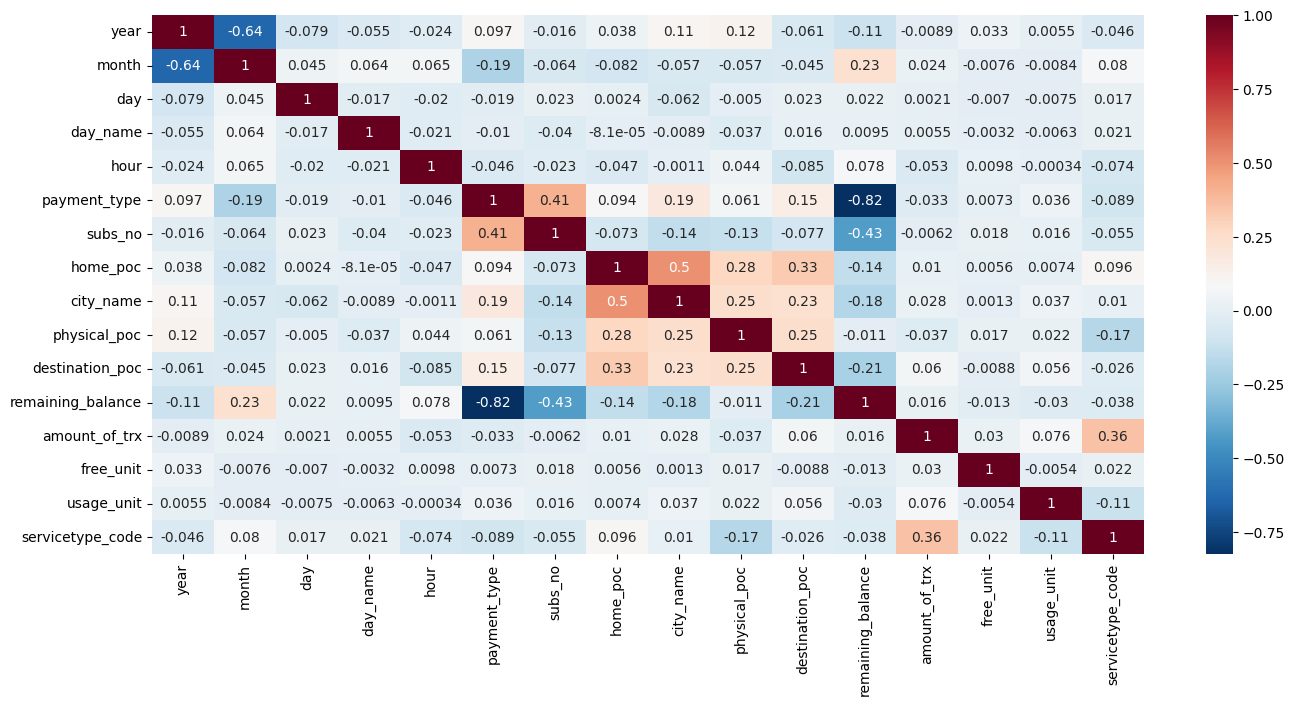

In [34]:
plt.figure(figsize = (16,7))
corr_plot = sns.heatmap(data.corr(),cmap="RdBu_r", annot=True)
print(corr_plot)

In [35]:
threshold = 0.2

choosen_columns = []
for column in data_corr:
    if any((data_corr[column] > threshold) | (data_corr[column] < -threshold)):
        choosen_columns.append(column)

print("Choosen columns:", choosen_columns)

Choosen columns: ['year', 'month', 'day', 'day_name', 'hour', 'payment_type', 'subs_no', 'home_poc', 'city_name', 'physical_poc', 'destination_poc', 'remaining_balance', 'amount_of_trx', 'free_unit', 'usage_unit', 'servicetype_code']


In [36]:
data = data.drop(['year', 'day', 'subs_no', 'home_poc', 'physical_poc', 'destination_poc', 'amount_of_trx', 'free_unit','remaining_balance'], axis = 1)

3.) Scaling

In [37]:
data.head()

month  day_name  hour  payment_type  city_name  usage_unit servicetype_code
0      9         6    21             1         24         1.0                1
1      9         6    21             1         24         1.0                1
2      9         6    21             1         24         1.0                1
3      9         6     7             1         24         1.0                3
4      9         6     4             1         24   1048576.0                0

In [38]:
scaler = MinMaxScaler()
scale_column = ['usage_unit']
scaler.fit(data[scale_column])
data[scale_column] = scaler.transform(data[scale_column])
print(data)

       month  day_name  hour  payment_type  city_name    usage_unit   
0          9         6    21             1         24  0.000000e+00  \
1          9         6    21             1         24  0.000000e+00   
2          9         6    21             1         24  0.000000e+00   
3          9         6     7             1         24  0.000000e+00   
4          9         6     4             1         24  1.552794e-03   
...      ...       ...   ...           ...        ...           ...   
43942      4         2    18             1         24  3.641437e-06   
43943      4         2     7             1         24  6.945237e-07   
43944      4         2    20             1         24  5.064781e-02   
43945      4         2    11             1         24  4.549189e-04   
43946      4         2    22             1        101  1.183208e-06   

      servicetype_code  
0                    1  
1                    1  
2                    1  
3                    3  
4                    0

In [39]:
data.head()

month  day_name  hour  payment_type  city_name  usage_unit servicetype_code
0      9         6    21             1         24    0.000000                1
1      9         6    21             1         24    0.000000                1
2      9         6    21             1         24    0.000000                1
3      9         6     7             1         24    0.000000                3
4      9         6     4             1         24    0.001553                0

----------------------------------------

# **Decision Tree**

#### 1.) Import the necessary libraries

In [40]:
import pandas as pd #library untuk dataframe
import numpy as np #library untuk komputasi
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [41]:
data.head

<bound method NDFrame.head of        month  day_name  hour  payment_type  city_name    usage_unit   
0          9         6    21             1         24  0.000000e+00  \
1          9         6    21             1         24  0.000000e+00   
2          9         6    21             1         24  0.000000e+00   
3          9         6     7             1         24  0.000000e+00   
4          9         6     4             1         24  1.552794e-03   
...      ...       ...   ...           ...        ...           ...   
43942      4         2    18             1         24  3.641437e-06   
43943      4         2     7             1         24  6.945237e-07   
43944      4         2    20             1         24  5.064781e-02   
43945      4         2    11             1         24  4.549189e-04   
43946      4         2    22             1        101  1.183208e-06   

      servicetype_code  
0                    1  
1                    1  
2                    1  
3                

#### 2.) Split Data

In [42]:
X=data.drop('servicetype_code',axis=1) #menghilangkan output dari kriteria
print(X)

       month  day_name  hour  payment_type  city_name    usage_unit
0          9         6    21             1         24  0.000000e+00
1          9         6    21             1         24  0.000000e+00
2          9         6    21             1         24  0.000000e+00
3          9         6     7             1         24  0.000000e+00
4          9         6     4             1         24  1.552794e-03
...      ...       ...   ...           ...        ...           ...
43942      4         2    18             1         24  3.641437e-06
43943      4         2     7             1         24  6.945237e-07
43944      4         2    20             1         24  5.064781e-02
43945      4         2    11             1         24  4.549189e-04
43946      4         2    22             1        101  1.183208e-06

[43940 rows x 6 columns]


In [43]:
Y=data.servicetype_code # menampilkan kolom label (output/kelas)
print(Y)

0        1
1        1
2        1
3        3
4        0
        ..
43942    2
43943    2
43944    0
43945    0
43946    2
Name: servicetype_code, Length: 43940, dtype: object


#### 3.) CLASS DITRIBUTION

In [44]:
Y.value_counts()

servicetype_code
0    14639
1    10382
2    10292
3     4257
4     3627
5      550
6      193
Name: count, dtype: int64

<Axes: ylabel='count'>

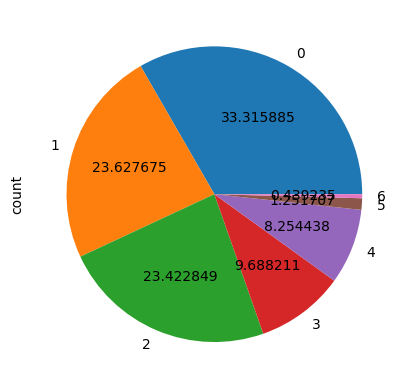

In [45]:
#SHOW PIE PLOT (Approach 1)
Y.value_counts().plot.pie(autopct='%2f')

#### 4.) RANDOM SAMPLING

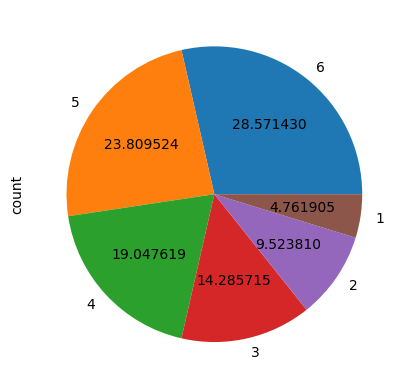

In [116]:
from imblearn.under_sampling import RandomUnderSampler

# Define the sampling strategy
sampling_strategy = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    
}

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=sampling_strategy)

# Perform under-sampling
X_res, Y_res = rus.fit_resample(X, Y)

ax = Y_res.value_counts().plot.pie(autopct='%2f')

In [117]:
Y_res.value_counts()

servicetype_code
6    6
5    5
4    4
3    3
2    2
1    1
Name: count, dtype: int64

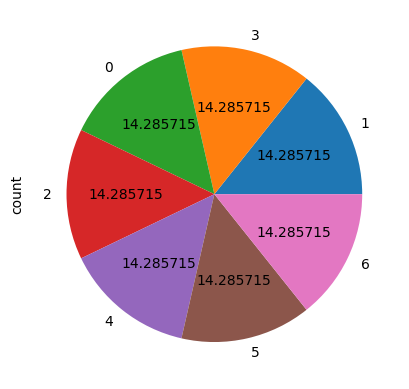

In [46]:
# Calculate the majority class count
majority_count = Y.value_counts().max()

# Define the sampling strategy
sampling_strategy = {
    '0': majority_count,
    '1': majority_count,
    '2': majority_count,
    '3': majority_count,
    '4': majority_count,
    '5': majority_count,
    '6': majority_count,
   
}

# Create an instance of RandomOverSampler
ros = RandomOverSampler(sampling_strategy=sampling_strategy)

# Perform over-sampling
X_res, Y_res = ros.fit_resample(X, Y)

ax = Y_res.value_counts().plot.pie(autopct='%2f')

In [47]:
Y_res.value_counts()

servicetype_code
1    14639
3    14639
0    14639
2    14639
4    14639
5    14639
6    14639
Name: count, dtype: int64

In [48]:
print(train_test_split)

<function train_test_split at 0x0000022CD13A8EA0>


## Split Data

In [49]:
# Splitting into train, test, and validation sets
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.25, random_state=42)

## Cross Val & fit decision tree

In [50]:
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Perform cross-validation on the training set
cv_scores = cross_val_score(dt, X_train, Y_train, cv=5)

# Fit the decision tree classifier on the training data
dt.fit(X_train, Y_train)


DecisionTreeClassifier()

## Pengecekan Tipe Data 

In [123]:
dtypes = X_train.dtypes
print(dtypes)

month             int32
day_name          int32
hour              int32
payment_type      int32
city_name         int32
usage_unit      float64
dtype: object


In [124]:
dtypes = Y_train.dtypes
print(dtypes)

object


## Akurasi CV

In [125]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.94356347 0.9448646  0.94315687 0.94380286 0.94282694]


## Prediksi & Akurasi

In [126]:
# Predict the labels for the training data
Y_train_pred = dt.predict(X_train)

# Evaluate the accuracy of the model on the training data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print("Training Accuracy:", round(train_accuracy * 100, 2), "%")

Training Accuracy: 97.47 %


In [127]:
# Evaluate the performance of the classifier
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8837
           1       0.92      0.95      0.93      8734
           2       0.99      0.96      0.98      8824
           3       0.95      0.92      0.94      8859
           4       0.99      1.00      0.99      8623
           5       0.99      1.00      0.99      8820
           6       0.97      1.00      0.99      8786

    accuracy                           0.97     61483
   macro avg       0.97      0.97      0.97     61483
weighted avg       0.97      0.97      0.97     61483



In [128]:
print(Y_train_pred[43000])

3


In [129]:
# Predict the labels for the testing data
Y_test_pred = dt.predict(X_test)

# Evaluate the accuracy of the model on the testing data
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Test-set accuracy score: ", round(accuracy_score(Y_test, Y_test_pred)* 100, 2), "%")

Test-set accuracy score:  94.84 %


In [130]:
# Evaluate the performance of the classifier
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2931
           1       0.89      0.89      0.89      2950
           2       0.95      0.88      0.91      2905
           3       0.91      0.91      0.91      2892
           4       0.95      0.98      0.96      3010
           5       0.97      1.00      0.98      2923
           6       0.97      1.00      0.99      2884

    accuracy                           0.95     20495
   macro avg       0.95      0.95      0.95     20495
weighted avg       0.95      0.95      0.95     20495



In [131]:
# Make predictions on the validation set
val_predictions = dt.predict(X_val)

# Evaluate the decision tree on the validation set
val_accuracy = dt.score(X_val, Y_val)
print("Validation accuracy:", val_accuracy)

Validation accuracy: 0.950085386679678


## Export Prediksi

In [132]:
df = pd.DataFrame (Y_test_pred)
filepath = 'Y_pred.xlsx'
df.to_excel(filepath, index=False)

In [133]:
# Evaluate the performance of the classifier
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2931
           1       0.89      0.89      0.89      2950
           2       0.95      0.88      0.91      2905
           3       0.91      0.91      0.91      2892
           4       0.95      0.98      0.96      3010
           5       0.97      1.00      0.98      2923
           6       0.97      1.00      0.99      2884

    accuracy                           0.95     20495
   macro avg       0.95      0.95      0.95     20495
weighted avg       0.95      0.95      0.95     20495



## Confusion Matrix

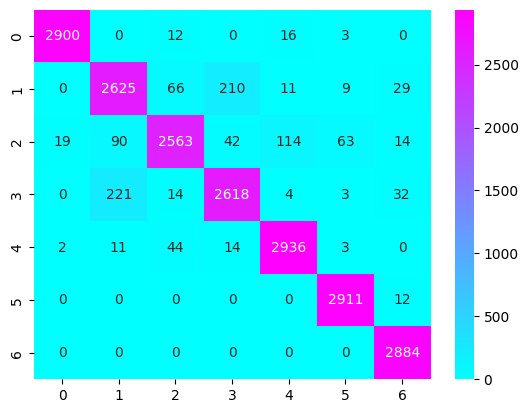

In [134]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test,Y_test_pred) #membuat confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='cool') #membuat plot confusion matrix
plt.show()

In [135]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_test_pred)

# Get the True Positive value
TP = cm[1, 1]

print("True Positive (TP):", TP)


True Positive (TP): 2625


## Decision Tree dengan Gini Index

In [64]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)
clf_gini.fit(X_train, Y_train)
#melatih data

DecisionTreeClassifier(max_depth=7, random_state=0)

In [65]:
y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: ', format(accuracy_score(Y_test, y_pred_gini)*100), "%")

Model accuracy score with criterion gini index:  63.95706269821908 %


## Prediksi Gini Index

In [66]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
#hasil y prediksi 

array(['5', '6', '5', ..., '0', '6', '2'], dtype=object)

## Export Prediksi

In [67]:
df = pd.DataFrame (y_pred_train_gini)

## save to xlsx file
filepath = 'y_pred_train_gini.xlsx'
df.to_excel(filepath, index=False)

## Visualisasi Tree

In [68]:
plt.figure(figsize=(80, 50), dpi=300)
tree.plot_tree(clf_gini.fit(X_train, Y_train), fontsize=50)

[Text(0.7470518867924528, 0.9375, 'x[5] <= 0.0\ngini = 0.857\nsamples = 61483\nvalue = [8837, 8734, 8824, 8859, 8623, 8820, 8786]'),
 Text(0.5530660377358491, 0.8125, 'x[4] <= 94.5\ngini = 0.835\nsamples = 52905\nvalue = [260, 8734, 8823, 8859, 8623, 8820, 8786]'),
 Text(0.3018867924528302, 0.6875, 'x[0] <= 11.5\ngini = 0.823\nsamples = 42853\nvalue = [159, 8434, 7526, 8078, 8000, 7768, 2888]'),
 Text(0.1509433962264151, 0.5625, 'x[0] <= 6.5\ngini = 0.799\nsamples = 29185\nvalue = [151, 3954, 5025, 6586, 7995, 4753, 721]'),
 Text(0.07547169811320754, 0.4375, 'x[4] <= 5.0\ngini = 0.769\nsamples = 13525\nvalue = [20, 2566, 2989, 3274, 21, 3934, 721]'),
 Text(0.03773584905660377, 0.3125, 'x[5] <= 0.0\ngini = 0.433\nsamples = 1753\nvalue = [3, 151, 284, 1280, 0, 35, 0]'),
 Text(0.018867924528301886, 0.1875, 'x[0] <= 1.5\ngini = 0.385\nsamples = 1667\nvalue = [1, 151, 219, 1280, 0, 16, 0]'),
 Text(0.009433962264150943, 0.0625, 'gini = 0.275\nsamples = 1309\nvalue = [1, 85, 100, 1107, 0, 16,

## Import Model

In [69]:
import pickle

# Menyimpan model ke dalam file
with open('model.pkl', 'wb') as f:
    pickle.dump(dt, f)

# Mengambil kembali model dari file
with open('model.pkl', 'rb') as f:
    dt = pickle.load(f)